## Introduction

- I have taken Macys Dataset by Webscraping data from the Macys Official Website to perform Clustering Analysis on Record Data. The data has been cleaned in the previous tabs. However, I have done some exploratory data analysis relevant for Cluster Analysis.
- The dataset contains of the Brand name, Apparel Category, Various Colors Available, Customer Ratings, URL of the product, Average Price among various colors, Stock available for each Color, Total Stock of the product, Gender of the Apparel and Price Type (Expensive or Reasonable). The table has 1429 rows with 20 columns which is eventually reduced to 12 columns.
- There are missing values found in the dataset which have been filled up. For contionous variables, the missing value has been filled up with the mean value. For the categorical variables, the missing value has been filled up with the modal value. Some of the features are categorical and are be converted into numeric using cat.codes.

In [274]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette='Set2')
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [275]:
# Macy's Data

df = pd.read_csv('macy_mw.csv')
df.head()

,Brand,Category,Color0,Color1,Color2,Color3,Color4,Color5,Rating,URL,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
0,Camper,Shoes,Multicolor,NaN,NaN,NaN,NaN,NaN,5.0000,https://www.macys.com/shop/product/camper-mens...,NaN,15,0,0,0,0,0,15,Men,NaN
1,Timberland,Shoes,Black,Dark Brown,NaN,NaN,NaN,NaN,4.5767,https://www.macys.com/shop/product/timberland-...,89.95,66,66,0,0,0,0,132,Men,Reasonable
2,Weatherproof Vintage,Men,Black,Rosin,Navy,Port,Pumpkin,NaN,0.0000,https://www.macys.com/shop/product/weatherproo...,49.00,10,10,10,10,10,0,50,Men,Reasonable
3,Michael Kors,Casual Button-Down Shirts,Black,White,Dark Blue,Alloy Gray,NaN,NaN,4.5116,https://www.macys.com/shop/product/michael-kor...,62.65,10,10,10,10,0,0,40,Men,Reasonable
4,Tommy Hilfiger,Blazers & Sport Coats,Brown,NaN,NaN,NaN,NaN,NaN,0.0000,https://www.macys.com/shop/product/tommy-hilfi...,139.99,91,0,0,0,0,0,91,Men,Expensive


In [276]:
# Remove unnecessary columns
df.drop(['Color1', 'Color2','Color3','Color4','Color5','URL','Color0','Category'], axis=1, inplace=True)

In [277]:
# Checking for missing values
df.isnull().sum()

Brand              0
Rating             0
Average_Price    281
C0_stock           0
C1_stock           0
C2_stock           0
C3_stock           0
C4_stock           0
C5_stock           0
Total_stock        0
Gender             0
Price_type       281
dtype: int64

In [278]:
# Replace continuous missing values with mean of the column. check for Nan values again.
df['Average_Price'] = df['Average_Price'].fillna(df['Average_Price'].mean())

In [279]:
# Replace categorical missing values with mode of the column. check for Nan values again.
df['Price_type'] = df['Price_type'].fillna(df['Price_type'].mode()[0])


In [280]:
# Checking for missing values
df.isnull().sum()

Brand            0
Rating           0
Average_Price    0
C0_stock         0
C1_stock         0
C2_stock         0
C3_stock         0
C4_stock         0
C5_stock         0
Total_stock      0
Gender           0
Price_type       0
dtype: int64

In [281]:
# Replace categorical values with category codes by using the cat.codes function. 
df['Brand'] = df['Brand'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Price_type'] = df['Price_type'].astype('category').cat.codes
df.head()

,Brand,Rating,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
0,35,5.0000,140.506462,15,0,0,0,0,0,15,0,1
1,189,4.5767,89.950000,66,66,0,0,0,0,132,0,1
2,210,0.0000,49.000000,10,10,10,10,10,0,50,0,1
3,134,4.5116,62.650000,10,10,10,10,0,0,40,0,1
4,193,0.0000,139.990000,91,0,0,0,0,0,91,0,0


In [282]:
# Split the dataset in X and y. 
# Since this is unsupervised learning, we will not use the y labels. 
# Normalizing the X data by using the StandardScaler function.

X = df.drop('Price_type', axis=1)
y = df['Price_type']
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Clustering

One of the most popular methods for gaining a general understanding of the datas structure is clustering. It can be summed up as the process of finding data subgroups where data points in the same subgroup (cluster) are extremely similar and other data points in other clusters are very dissimilar. To put it another way, we look for homogeneous subgroups within the data so that the data points in each cluster are as comparable as feasible based on a similarity metric like the euclidean-based distance or the correlation-based distance.

Since we lack the ground truth to compare the output of the clustering algorithm to the true labels in order to assess its success, clustering is regarded as an unsupervised learning technique. By dividing the data points into discrete subgroups, we simply wish to try to study the datas structure.

In [283]:
# Importing relevent libraries for clustering. 
# We will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn.cluster import Birch

## K-Means Clustering

The iterative Kmeans algorithm attempts to divide the dataset into K unique, non-overlapping subgroups (clusters), each of which contains a single data point. While keeping the clusters as distinct (far) apart as possible, it aims to make the intra-cluster data points as comparable as possible. It assigns data points to clusters in a way that minimizes the sum of the squared distances between the data points and the cluster centroid, which is the average value of all the data points in the cluster. The homogeneity (similarity) of the data points within a cluster increases as the amount of variance within the cluster decreases.

It is advised to standardize the data to have a mean of zero and a standard deviation of one because clustering algorithms, such as kmeans, use distance-based measurements to compare the similarity between data points. This is because features in any dataset almost always have different units of measurement, such as age vs. income.

Different initializations may result in different clusters since the kmeans method may get trapped in a local optimum and not converge to a global optimum due to its iterative nature and the random initialization of centroids at the beginning of the algorithm. Therefore, it is advised to execute the method with several centroids initializations and select the results of the run that produced the smallest sum of squared distance.

# Hyper Parameter Tuning:
Elbow Method is the hyper parameter tuning technique employed here. Since the data set dimension is tiny and the elbow approach works well for data with small dimensions, this method was chosen. An average score for all clusters is determined for each value of k. In order to get the closest centroid for each value, distortion and inertia are computed.

Determining the datas ideal K value. The simplest clustering algorithm is K-means. For an n-count of records, it creates K clusters. The following is how the analogy works: The initialization of k is random. The term for it is cluster centriods. This k value ranges from 1 to 10 in the code below. Inertia is estimated for each k. The distance between each data point and its centroid is squared and added to determine inertia. One with little inertia and few clusters is an excellent model. Each k-distortion values is calculated. It is the separation between each observation and the centroid with the greatest dominance. Low distortion is ideal for clusters.

In [284]:
# For k means clustering we will use the elbow method to find the optimal number of clusters. 
# we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. 
# we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. 
# make sure to save it in a dataframe and plot it using matplotlib.

inertia = pd.DataFrame(columns=['clusters', 'inertia', 'distortion'])
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia = inertia.append({'clusters': i, 'inertia': kmeans.inertia_, 'distortion': sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]}, ignore_index=True)
inertia


,clusters,inertia,distortion
0,1.0,15719.000000,2.411847
1,2.0,10596.758772,2.214785
2,3.0,8712.580554,2.083794
3,4.0,7101.937829,1.718951
4,5.0,5867.150917,1.687678
5,6.0,5146.849967,1.481304
6,7.0,4547.479940,1.435545
7,8.0,4113.220136,1.327980
8,9.0,3737.031820,1.201778
9,10.0,3409.938276,1.165319


array([<AxesSubplot:xlabel='clusters'>, <AxesSubplot:xlabel='clusters'>],
      dtype=object)

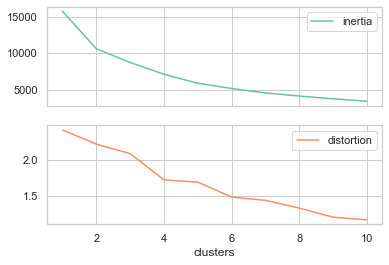

In [285]:
# plot distortion and inertia for kmeans, 
# you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. 
# Suggest the optimal number of clusters based on the plot.

inertia.plot.line(x="clusters", subplots=True)

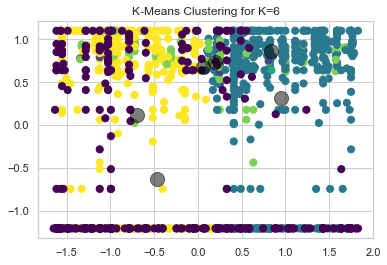

In [286]:
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering for K=6')
plt.show()

A graph is plotted against the k clusters and, inertia and distortion respectively
We can see that the graph decreases linearly after k=6.Therefore, optimal k is chosen as 6.
Data is fit into K-means algorithm after choosing the optimal K value as 6. The labels are then predicted. A graph is plotted for 6 clusters for two variables in the data. We see that some of the clusters are overlapping.

## DBSCAN Clustering

Clusters are dense areas of the data space that are divided by areas of lower point densities. This common understanding of clusters and noise is the foundation of the DBSCAN algorithm. The main idea is that at least a certain number of points must be present in the vicinity of each point within a cluster for a given radius.

DBSCAN algorithm requires two parameters:

- eps : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to eps then they are considered neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
- MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

# Hyper-Tuning Parameter:
Choosing the best cluster value using the Silhouette score for hyper parameter tweaking.
The cohesiveness (similarity) of a data point within a cluster as compared to other clusters is measured by the silhouette co-efficient. Selected a set of possible k values and computed EPs, Min Samples, and Score for each K value.

In [287]:
# DBSCAN Clustering

# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. 
# plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

dbscan_df = pd.DataFrame(columns=['eps', 'min_samples', 'clusters', 'silhouette_score'])

for i in np.arange(0.1, 2.1, 0.1):
    
    for j in range(1, 11):
        
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(X)
        
        if (len(set(dbscan.labels_) - set([-1])) > 1) & (len(set(dbscan.labels_) - set([-1])) < 11):
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': len(set(dbscan.labels_) - set([-1])), 'silhouette_score': silhouette_score(X, dbscan.labels_)}, ignore_index=True)
        
        else:
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': 0, 'silhouette_score': 0}, ignore_index=True)
        
dbscan_df.head()

,eps,min_samples,clusters,silhouette_score
0,0.1,1.0,0.0,0.0
1,0.1,2.0,0.0,0.0
2,0.1,3.0,0.0,0.0
3,0.1,4.0,0.0,0.0
4,0.1,5.0,0.0,0.0


# Plot for Silhouette scores for each cluster value.

The value of silhouette coefficient is [-1,1] 

- 1 denotes that the data is very compact and is within the cluster. 
- -1 value denotes that the data is no where near the cluster. 
- 0 denotes that the clusters are overlapping.

From the graph plotted below, the optimal cluster size is 2, eps is 1.6, and min_samples is 9.

<AxesSubplot:xlabel='clusters'>

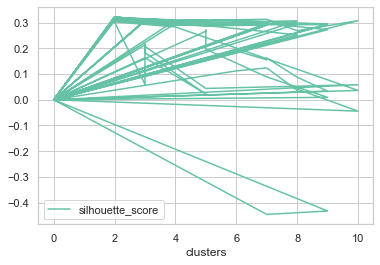

In [288]:
dbscan_df.plot.line(x='clusters', y='silhouette_score')


In [289]:
dbscan_df[dbscan_df['silhouette_score'] == max(dbscan_df['silhouette_score'])]

,eps,min_samples,clusters,silhouette_score
139,1.4,10.0,2.0,0.322867


In [290]:
optimal_cluster_size = dbscan_df['clusters'][dbscan_df['silhouette_score'] == max(dbscan_df['silhouette_score'])]
optimal_cluster_size

139    2.0
Name: clusters, dtype: float64

After calculating the optimal values, the data is fit into DBSCAN algorithm. labels are predicted. 1 in labels is essentially noise. In this record data we dont see any noise. The unique cluster labels are 0 and 1.

In [291]:
dbscan = DBSCAN(eps=1.7, min_samples=10)
dbscan.fit(X)
y_pred = dbscan.fit_predict(X)
labels_DB = dbscan.labels_
print(labels_DB)

[0 0 0 ... 2 2 2]


In [292]:
import collections
collections.Counter(labels_DB)


Counter({0: 852, -1: 103, 1: 9, 2: 465})

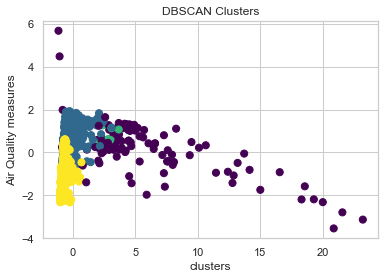

In [293]:
#plot clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_DB, s=50, cmap='viridis')
plt.xlabel('clusters')
plt.ylabel('Air Quality measures') 
plt.title('DBSCAN Clusters')
plt.show()

# Agglomerative Hierarchical Clustering

The most typical hierarchical clustering method used to put objects in clusters based on their similarity is called agglomerative clustering. Another name for it is AGNES (Agglomerative Nesting). Each object is first treated as a singleton cluster by the algorithm. Once all clusters have been merged into a single large cluster containing all items, pairs of clusters are gradually combined. The outcome is a dendrogram, which is a tree-based representation of the objects.

The process of agglomerative clustering is bottom up. In other words, each item is originally thought of as a cluster with just one piece (leaf). The two clusters that are the most comparable are joined into a new, larger cluster at each stage of the process (nodes). The process is repeated until every point is a part of a single large cluster.

By calculating the euclidean distance between the data points, we start the agglomerative clustering procedure. Then, in order to create our initial node, we merge the matrixs smallest non-zero distance. We must update our distance matrix each time there is a new node or cluster. However, we were still unsure of how far apart two distinct clusters were from one another. Moving on, we must establish the linking criterion, where the distance between clusters X and Y is determined by the minimal distance between x and y, which are members of the X and Y clusters, respectively.Up until all the data is clustered into a single cluster, the merging event is continuously repeated. We would ultimately obtain a dendrogram with all the data combined into a single cluster.

# Determining the number of clusters
What do we do with the dendrogram that we already have? It would be used to help us select a cluster for our data. Keep in mind that the dendrogram simply displayed the datas hierarchy; it did not provide us with the precise number of clusters that was ideal.

By eyeballing our dendrogram and selecting a specific value as our cut-off point, we can best determine the cluster number (manual way). The cut-off point that produces the tallest vertical line is typically used. The number of the cluster would be determined by how many times the horizontal line crossed the vertical line.

In [294]:
# Agglomerative Clustering - Hierarchical Clustering

# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering().fit(X)
labels = model.labels_

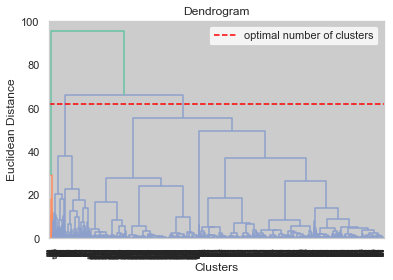

In [295]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. The optimal number of clusters based on the dendrogram.

Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=62, color='r', linestyle='--', label='optimal number of clusters')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()

# 2 clusters are optimal.

# Final Results

- Performing clustering using varios algorithms gave various results. The K means algorithm used 8 clusters to classify the data set, DBSCAN only 2 clusters were chosen and Agglomerative Hierarchical Clustering chose 2 clusters to be optimal.
- From the methods it is safe to say that the data has more similarity. Because most data points fall into one cluster.
- Aglomerative clustering was more time consuming, followed by DBSCAN and K- means. 


# Conclusion

The retail e-commerce data was chosen for clustering algorithm to identify similarities between fashion trends in Macy data. Performing clustering on this algorithm proves that although, there are few dissimilar data points. Out of the three algorithms used, DBSCAN is found best for this dataset considering the time, number of clusters and data points in each clusters.